In [4]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
crime = pd.read_csv("C:\\Users\\RUSHIKESH\\Downloads\\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
crime1 = crime.rename({'Unnamed: 0' : 'Place'},axis=1)
crime1.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
crime.shape

(50, 5)

In [8]:
# first we will normalize the data to reduce the scalar

def norm_fun(i):
    return ((i-i.mean())/(i.std()))

In [9]:
df_norm = norm_fun(crime1.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,1.242564,0.782839,-0.520907,-0.003416
1,0.507862,1.106823,-1.211764,2.484203
2,0.071633,1.478803,0.998980,1.042878
3,0.232349,0.230868,-1.073593,-0.184917
4,0.278268,1.262814,1.758923,2.067820


# H-Clustering :-

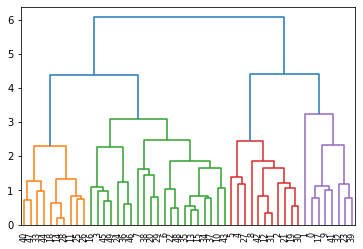

In [10]:
# create a dendrogram


dist = sch.linkage(df_norm , method = 'complete')
dendrogram = sch.dendrogram(dist)


In [10]:
# create a cluster

cluster = AgglomerativeClustering(linkage='complete', n_clusters=4 , affinity='euclidean')
cluster

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [11]:
y_cluster = cluster.fit_predict(df_norm)
y_cluster


array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [13]:
crime1['h_cluster'] = pd.Series(y_cluster)
crime1

,Place,Murder,Assault,UrbanPop,Rape,h_cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [27]:
result1 = crime1.iloc[:,1:].groupby(y_cluster).mean()
result1

,Murder,Assault,UrbanPop,Rape,h_cluster
0,14.087500,252.750000,53.500000,24.537500,0
1,5.871429,134.476190,70.761905,18.580952,1
2,11.054545,264.090909,79.090909,32.618182,2
3,3.180000,78.700000,49.300000,11.630000,3


In [42]:
# By using Hierarchy clustering technique we get the 4 clusters and there mean are as above result1

# ---------------------------------------------------------------------------------------------------------------

# K-means - Clustering :-

In [15]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [16]:
kmeans_cluster = KMeans(n_clusters=4)
kmeans_cluster.fit(df_norm)

KMeans(n_clusters=4)

In [17]:
kmeans_cluster.labels_

array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 3,
       0, 1, 2, 0, 0, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2])

In [18]:
crime2 = crime1.iloc[:,:-1]

In [19]:
crime2['Cluster_ID']=pd.Series(kmeans_cluster.labels_)
crime2.head()

,Place,Murder,Assault,UrbanPop,Rape,Cluster_ID
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [21]:
result2 = crime1.iloc[:,1:-1].groupby(crime2.Cluster_ID).mean()
result2

,Murder,Assault,UrbanPop,Rape
Cluster_ID,,,,
0,3.600000,78.538462,52.076923,12.176923
1,13.937500,243.625000,53.750000,21.412500
2,5.852941,141.176471,73.647059,19.335294
3,10.966667,264.000000,76.500000,33.608333


In [22]:
# now we will find out the true value for k:


In [23]:
k = list(range(2,7))
k
TWSS = []
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = []
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    print ("WSS when k is" , i , sum(WSS))
    TWSS.append(sum(WSS))
        

WSS when k is 2 [66.72776899]
WSS when k is 3 [57.75917684]
WSS when k is 4 [49.81730942]
WSS when k is 5 [45.8654042]
WSS when k is 6 [43.46913404]


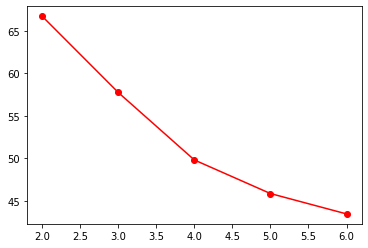

In [24]:
plt.plot(k,TWSS,"ro-")

In [25]:
# from above figure we are getting the k value for our cluster is 4 .

In [26]:
result2 = crime1.iloc[:,1:-1].groupby(crime2.Cluster_ID).mean()
result2

,Murder,Assault,UrbanPop,Rape
Cluster_ID,,,,
0,3.600000,78.538462,52.076923,12.176923
1,13.937500,243.625000,53.750000,21.412500
2,5.852941,141.176471,73.647059,19.335294
3,10.966667,264.000000,76.500000,33.608333


In [ ]:
# By using K-Means clustering technique we get the 4 clusters and there mean are as above result2

# ---------------------------------------------------------------------------------------------------------------

# DBSCAN :-

In [29]:
from sklearn.cluster import DBSCAN

In [43]:
dbscan = DBSCAN(eps=1,min_samples=4).fit(df_norm)
dbscan

DBSCAN(eps=1, min_samples=4)

In [44]:
pd.Series(dbscan.labels_).value_counts()

 1    29
-1    17
 0     4
dtype: int64

In [45]:
cl =pd.DataFrame(dbscan.labels_)

In [46]:
cl.head()

,0
0,0
1,-1
2,-1
3,1
4,-1


In [47]:
crime3 = crime2.iloc[:,:-1]

In [48]:
crime3["Cluster"]=cl

In [49]:
crime3


,Place,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [50]:
# calculate the sillhouette score to calculate the DBSCAN performance

In [51]:
from sklearn import metrics

In [52]:
print("sillihoette score : %f" %metrics.silhouette_score(df_norm,dbscan.labels_))

sillihoette score : 0.212134


In [53]:
result3 = crime1.iloc[:,1:-1].groupby(crime3.Cluster).mean()
result3

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
-1,11.135294,250.529412,71.882353,29.311765
0,14.050000,238.000000,57.750000,23.200000
1,4.962069,114.724138,62.896552,16.224138


In [55]:
# from using DBSCAN clustering we get the outliers which are represented by -1
# and we get the 2 clusters and there mean as per above result3

# ---------------------------------------------------------------------------------------------------------------